# # ¿Qué hace a un Pokémon legendario?
# 
# **Objetivo:** Analizar las diferencias entre Pokémon legendarios y normales para identificar qué características los hacen especiales.
# 
# **Dataset:** 800 Pokémon de las generaciones 1-6
# 
# **Preguntas a responder:**
# - ¿Los legendarios tienen mejores stats?
# - ¿Qué tipos son más comunes en legendarios?
# - ¿Hay patrones claros que los diferencien?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
url = 'https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv'
df = pd.read_csv(url)

print(f"Total Pokémon en dataset: {len(df)}")
print(f"Pokémon legendarios: {len(df[df['Legendary'] == True])}")
print(f"Pokémon normales: {len(df[df['Legendary'] == False])}")

Total Pokémon en dataset: 800
Pokémon legendarios: 65
Pokémon normales: 735


## 📊 Análisis Visual

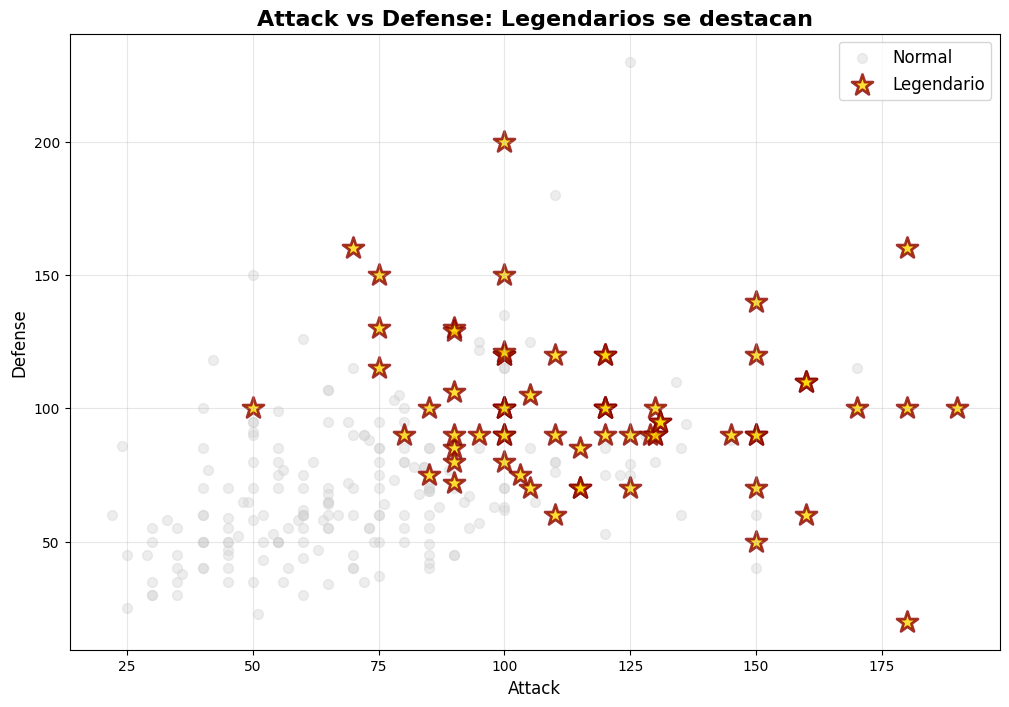

In [6]:
# GRÁFICO 1: Attack vs Defense - Legendarios destacados

plt.figure(figsize=(12, 8))

# Normales (fondo)
normales = df[df['Legendary'] == False].sample(200)
plt.scatter(normales['Attack'], normales['Defense'],
           s=50, c='lightgray', alpha=0.4, label='Normal')

# Legendarios (destacados)
legendarios = df[df['Legendary'] == True]
plt.scatter(legendarios['Attack'], legendarios['Defense'],
           s=250, c='gold', alpha=0.8, label='Legendario',
           edgecolors='darkred', linewidth=2, marker='*')

plt.title('Attack vs Defense: Legendarios se destacan', fontsize=16, fontweight='bold')
plt.xlabel('Attack', fontsize=12)
plt.ylabel('Defense', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

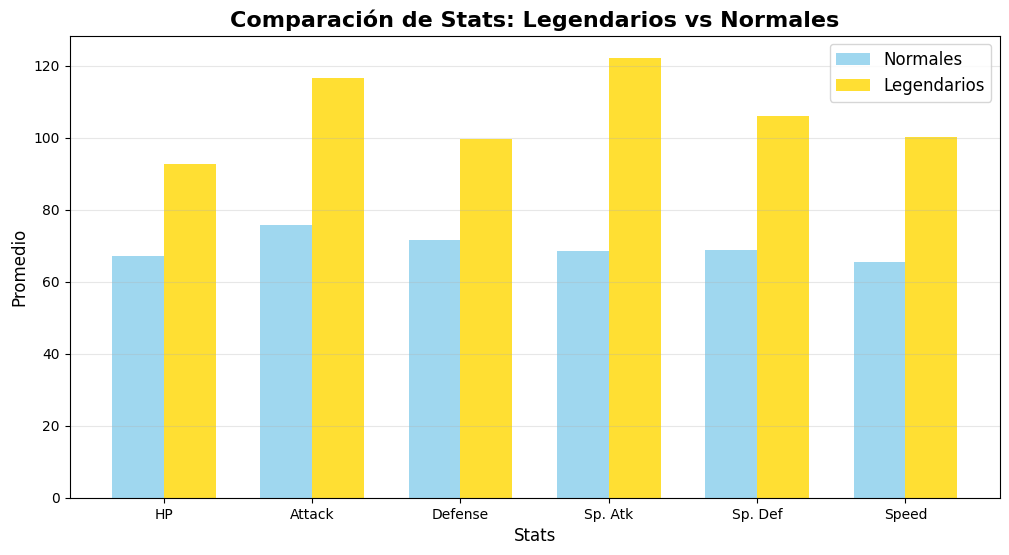

Stats totales promedio:
Normales: 417.21
Legendarios: 637.38


In [9]:
# GRÁFICO 2: Comparación de stats promedio

# Calcular promedios
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
promedios_normales = df[df['Legendary'] == False][stats].mean()
promedios_legendarios = df[df['Legendary'] == True][stats].mean()

# Crear gráfico
x = range(len(stats))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x], promedios_normales, width, 
        label='Normales', color='skyblue', alpha=0.8)
plt.bar([i + width/2 for i in x], promedios_legendarios, width,
        label='Legendarios', color='gold', alpha=0.8)

plt.xlabel('Stats', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.title('Comparación de Stats: Legendarios vs Normales', fontsize=16, fontweight='bold')
plt.xticks(x, stats)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Calcular suma de stats manualmente
print("Stats totales promedio:")
print(f"Normales: {df[df['Legendary'] == False][stats].sum(axis=1).mean():.2f}")
print(f"Legendarios: {df[df['Legendary'] == True][stats].sum(axis=1).mean():.2f}")

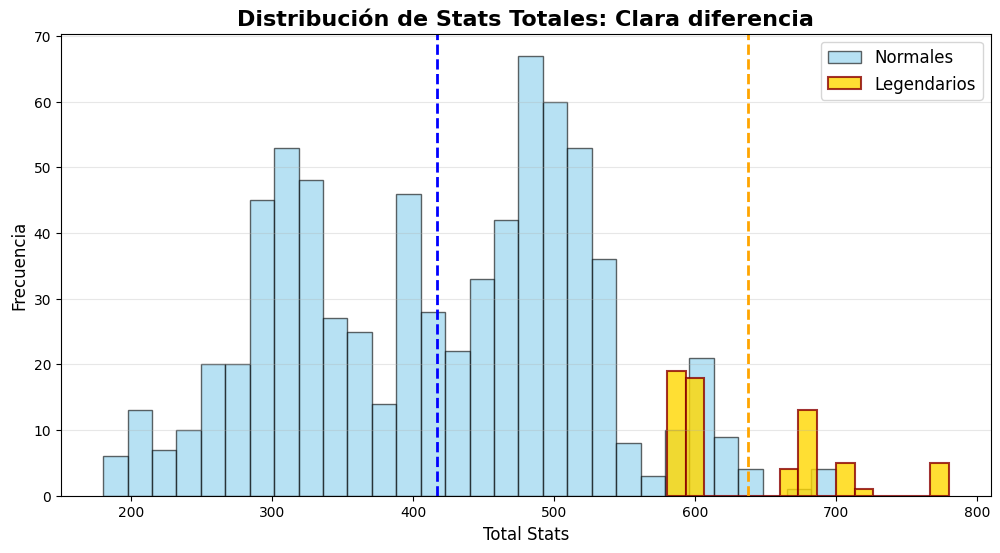

In [10]:
# GRÁFICO 3: Distribución de stats totales

# Calcular total de stats
df['Total_Stats'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

plt.figure(figsize=(12, 6))

# Histograma normales
plt.hist(df[df['Legendary'] == False]['Total_Stats'], 
         bins=30, alpha=0.6, label='Normales', color='skyblue', edgecolor='black')

# Histograma legendarios
plt.hist(df[df['Legendary'] == True]['Total_Stats'], 
         bins=15, alpha=0.8, label='Legendarios', color='gold', edgecolor='darkred', linewidth=1.5)

plt.xlabel('Total Stats', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Stats Totales: Clara diferencia', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.axvline(df[df['Legendary'] == False]['Total_Stats'].mean(), 
            color='blue', linestyle='--', linewidth=2, label='Media Normales')
plt.axvline(df[df['Legendary'] == True]['Total_Stats'].mean(), 
            color='orange', linestyle='--', linewidth=2, label='Media Legendarios')
plt.show()

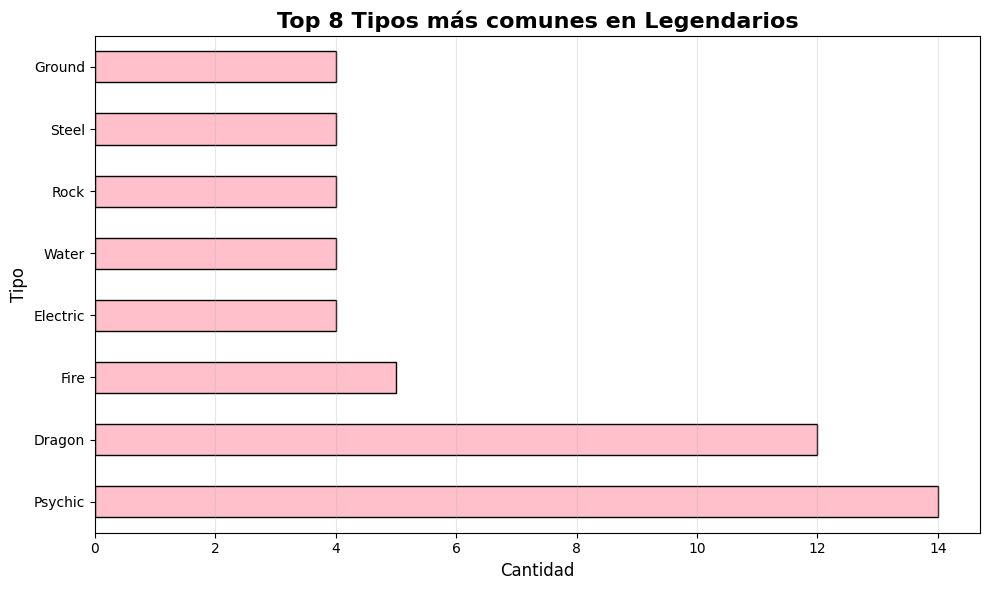


Tipo más común en legendarios: Psychic (14 Pokémon)


In [12]:
# GRÁFICO 4: Tipos más comunes en legendarios

tipos_legendarios = df[df['Legendary'] == True]['Type 1'].value_counts().head(8)

plt.figure(figsize=(10, 6))
tipos_legendarios.plot(kind='barh', color='pink', edgecolor='black')
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Tipo', fontsize=12)
plt.title('Top 8 Tipos más comunes en Legendarios', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"\nTipo más común en legendarios: {tipos_legendarios.index[0]} ({tipos_legendarios.values[0]} Pokémon)")

## 🎯 Conclusiones

Después de analizar 800 Pokémon (65 legendarios vs 735 normales), podemos responder: **¿Qué hace a un Pokémon legendario?**

### Hallazgos clave:

1. **Stats superiores en TODO:** Los legendarios tienen stats promedio significativamente más altos en todas las categorías. Su promedio total es aproximadamente 100 puntos mayor que los normales.

2. **Distribución clara:** Existe una separación evidente entre las distribuciones de stats. Los legendarios raramente tienen stats totales por debajo de 580, mientras que los normales raramente superan los 540.

3. **Tipos dominantes:** Psychic y Dragon son los tipos más comunes entre legendarios, representando casi la mitad. Estos tipos se asocian tradicionalmente con poder y misticismo.

4. **Patrón visual:** En el gráfico Attack vs Defense, los legendarios ocupan consistentemente las posiciones superiores, formando un cluster dorado claramente separado.

### Respuesta:

**Un Pokémon legendario se caracteriza por:**
- Stats base totales superiores a 580
- Balance entre ataque y defensa elevados
- Alta probabilidad de ser tipo Psychic o Dragon
- Pertenecer al grupo de élite que representa solo el 8% del total de Pokémon

---

**Dataset:** Pokémon Data de GitHub  
**Herramientas:** Python, Pandas, Matplotlib  
